# Entsoe-py 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
%matplotlib inline

* top1
* top2
* top3

In [2]:
import pandas as pd
import entsoe.entsoe as ent

In [3]:
ent_app = ent.Entsoe('your secret key')

In [4]:
domain = ent.DOMAIN_MAPPINGS['CH']
start_tm = pd.datetime(2018,2,1)
end_tm = pd.datetime(2018,2,12)

In [8]:
df_ch = ent_app.query_price('CH', start_tm, end_tm, as_series=True)

HTTP Error, retrying in 0 seconds


In [6]:
df_de = ent_app.query_price('BE', start_tm, end_tm, as_series=True)

HTTP Error, retrying in 0 seconds


In [7]:
df_de.tail(10)

AttributeError: 'NoneType' object has no attribute 'tail'

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(df_ch)
plt.title('Price Switzerland (EUR)')
plt.xlabel('Date')
plt.ylabel('EUR')
plt.xticks(rotation=75)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(df_de)
plt.title('Price Belgium (EUR)')
plt.xlabel('Date')
plt.ylabel('EUR')
plt.xticks(rotation=75)
plt.grid(True)

plt.subplots_adjust(top=1.1, bottom=-1.1, left=-1.25, right=1.25, hspace=0.5, wspace=1.5)

plt.show()

In [38]:
start_tm = pd.datetime(2018,2,1)
end_tm = pd.datetime(2018,2,11)
fc_de = ent_app.query_generation('FR', start_tm, end_tm, as_dataframe=True, psr_type=None, squeeze=False)


In [39]:
fc_de.head()

,Biomass,Fossil Gas,Fossil Hard coal,Fossil Oil,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Waste,Wind Onshore
2018-02-01 01:00:00+01:00,401.0,2452.0,745.0,239.0,3069.0,5596.0,1523.0,56115.0,59.0,244.0,4212.0
2018-02-01 02:00:00+01:00,401.0,2426.0,697.0,239.0,2485.0,5471.0,1132.0,55841.0,60.0,242.0,4038.0
2018-02-01 03:00:00+01:00,402.0,2430.0,682.0,238.0,2746.0,5377.0,978.0,55727.0,59.0,246.0,3991.0
2018-02-01 04:00:00+01:00,402.0,2460.0,705.0,237.0,2807.0,5250.0,1261.0,56083.0,59.0,250.0,4340.0
2018-02-01 05:00:00+01:00,403.0,2719.0,691.0,238.0,2719.0,5355.0,1589.0,56216.0,59.0,248.0,4617.0


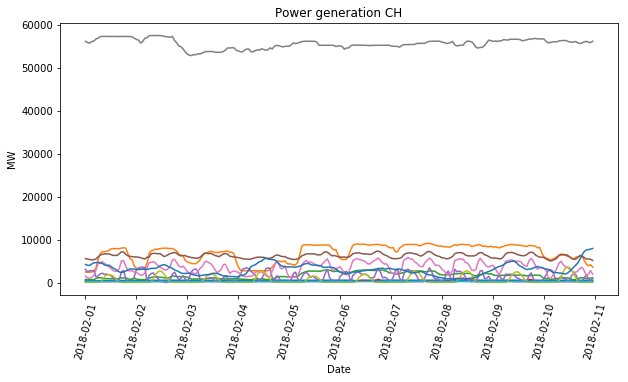

In [41]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)

plt.plot(fc_de)
plt.title('Power generation CH')
plt.xlabel('Date')
plt.ylabel('MW')
plt.xticks(rotation=75)

plt.show()

In [42]:
fc_df = fc_de.copy()

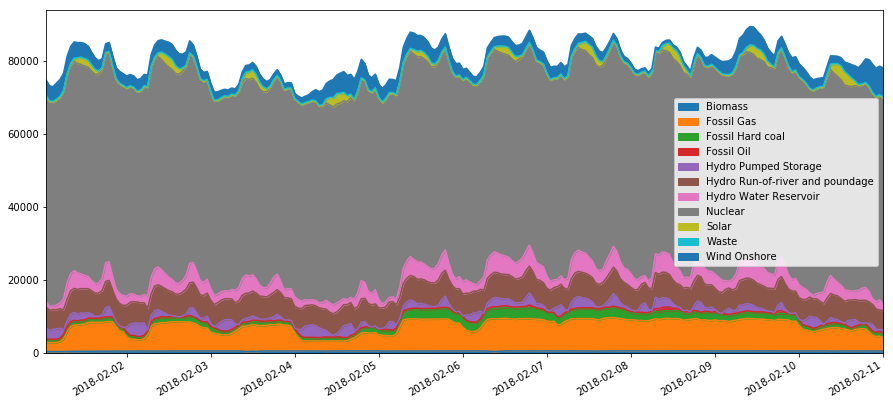

In [43]:
plt.rcParams["figure.figsize"] = (15,7)
fc_df.plot.area()